# Visualizing GRB areas in TESS Sectors

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.animation as animation
from IPython.display import HTML

## Looking at a postage stamp 25x25 pixels around RA 49.19939 DEC -58.53253

In [51]:
inputfile = 'tess-s0002-3-4_49.19939_-58.53253_25x25_astrocut.fits'
# step 1: read in the data
def getFITSdata(tessfile):
    fitsfile = fits.open(tessfile)
    headerdata = fitsfile[0].header
    checkdata = fitsfile[1].data
    fitsfile.close()
    pixeldata = np.asarray(checkdata)
    return (headerdata, pixeldata, checkdata)

header, pixels, check = getFITSdata(inputfile)

fig, ax = plt.subplots(1, 2, figsize=(9, 4))
fig.suptitle('Sector 2 GRB', fontsize=20)

ax_im = ax[0]
ax_diff = ax[1]

Z = np.stack(pixels['FLUX'][0])
im_im = ax_im.imshow(Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', animated=True)
im_diff = ax_diff.imshow(Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                   cmap='PuBu_r', animated=True)

ax_im.set_title('Raw Flux from FFI - LogNorm')
ax_diff.set_title('Diff Flux: Changes - LogNorm')
ax_im.set_yticklabels([])
ax_im.set_xticklabels([])
ax_diff.set_yticklabels([])
ax_diff.set_xticklabels([])

def updatefig(idx):
    image0 = np.stack(pixels['FLUX'][idx])
    try:
        imageN = np.stack(pixels['FLUX'][idx + 1])
    except IndexError:
        imageN = np.stack(pixels['FLUX'][idx])
    except Exception as ex:
        print('There was a different problem: ' + str(ex))
        
    im_im.set_array(image0)
    
    im_diff.set_array(np.subtract(imageN, image0))
    
    return im_im, 

ani = animation.FuncAnimation(fig, updatefig, frames=len(pixels), blit=True, repeat=True, interval=400)
plt.close(fig)
HTML(ani.to_html5_video())
ani.save('animation_s2_49-58.mp4')
    

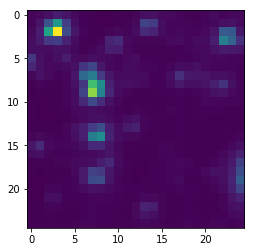

In [38]:
Z = np.stack(pixels['FLUX'][0])
plt.imshow(Z)

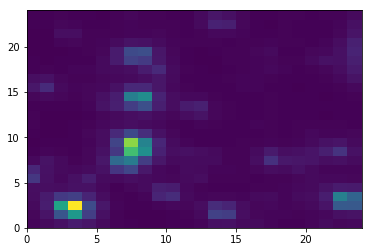

In [40]:
x = np.arange(0, 25)
y = np.arange(0, 25).reshape(-1, 1)
plt.pcolor(x, y, Z)